In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Distributions

We looked at histograms, pmf, and cdf charts to get an idea of the distribution of our data - or how it is spread out over the range. Are most values clustered together closely? Are values fairly evenly spread out? Are there patterns? Outliers? Clusters?

Everything we've dealt with thus far has been emperical - i.e. we've taken actual data, and looked at the shape of that data to see the (actual, real life) distribution. This inheirently depends on collecting some data, and looking at it - this real world aspect has some limitations, you need to have actual data collected.  

Now we're going to look at analytical distributions - mathmatical models that represent a distribution. Analytical distributions allow us to look at/analyze/calculate things without having to collect all that data - we can use the mathmatical formula as a siplified representation of what we would expect to find if we did collect the data.

In many cases the model can pretty accurately represent the real data, and we can use the simple model to do analysis and make predictions, having faith that the data will closely mirror our calculations.

The most common and well know example of this the the normal distribution or bell curve. We can use this model to analyze may distributions we see in real life - the heights, home prices, etc from the demonstrations tend to look a lot like bell curves, as do many things in real life. 

Our goal for this one is to get a model that models (part of) COVID growth!

In [2]:
#Load some Covid Data
#Note the sep thing - that tells Pandas that the separator is a semi-colon. This is just weird data.
#In theory, the separator could be anything (it is usually a comma), just use this if it is
df = pd.read_csv("data/full_data_2.csv", sep=";")
df.head()

,Time,Infections
0,23/01/2020,1
1,24/01/2020,1
2,25/01/2020,2
3,26/01/2020,2
4,27/01/2020,5


In [3]:
#I'm going to add a "Day Number" value. This just makes it easier than using dates.
#Note: you could write a function to translate days to dates...
#The command to do this is just a Google result "dataframe add running number". I add 1 to avoid a log(0) scenario. 
df["Day"] = np.arange(len(df))
df["Day"] = df["Day"].apply(lambda x: x+ 1)
df.drop([52,53], inplace=True)
df.tail()

,Time,Infections,Day
47,10/03/2020,472,48
48,11/03/2020,696,49
49,12/03/2020,987,50
50,13/03/2020,1264,51
51,14/03/2020,1678,52


Text(0.5, 1.0, 'COVID Gonna Give It To Ya')

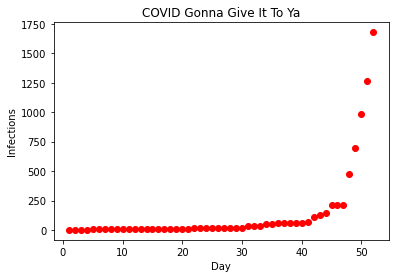

In [4]:
#Look at the growth!
#Note: I'm using something called pyplot to make this. Pyplot is what the thinkplot functions use.
#I'm doing this because I want a simple line. See imports for the added line above. 
plt.plot(df["Day"], df["Infections"], "or")
plt.xlabel('Day')
plt.ylabel('Infections')
plt.title('COVID Gonna Give It To Ya')

Text(0.5, 1.0, 'COVID Gonna Give It To Ya')

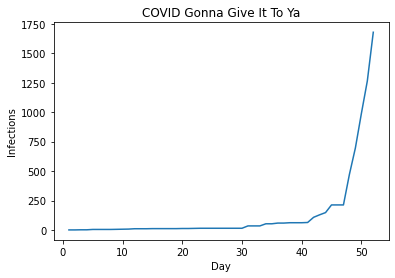

In [5]:
#As a line
plt.plot(df["Day"], df["Infections"])
plt.xlabel('Day')
plt.ylabel('Infections')
plt.title('COVID Gonna Give It To Ya')

In [ ]:
np.random.lognormal()

### Axis Scaling

Looks pretty exponential! 

What if we were to make the y axis into a logarithmic scale. Why?
<ul>
The original formula is y = s * b^x:
    <ul>
    <li>y = # infections
    <li>s = initial number of people infected
    <li>b = infections generated per infected person. (Growth Rate)
    <li>x = days in
    </ul>
</ul>
Taking the log of both sides and looking at in on that scale looks a little different....
y = log(s) + log(b) * x
Note: the y stays y, and not log(y) when we graph it, because of that log scale.

<b>This is now a linerar function! y=mx+b</b>

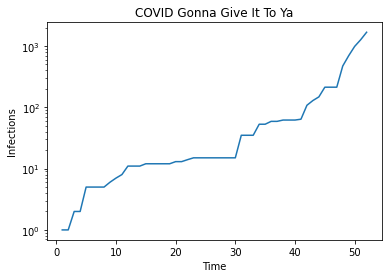

In [6]:
plt.plot(df["Day"], df["Infections"])
plt.xlabel('Time')
plt.ylabel('Infections')
plt.title('COVID Gonna Give It To Ya')
plt.yscale('log')

#### Test for Exponential

Now the line is kind of straight. The more straight it is, the "better". 

The closer this curve is to a line, the closer the real data is to exponential. Why?

In [7]:
#Generate best fit line
#You don't need to memorize this, we'll do this stuff later when we do scatter plots and regression. 
y = np.log(df["Infections"])
x = df["Day"]
m,b=np.polyfit(x, y, 1, w=np.sqrt(y))
y_fit=np.exp(m*x+b)
print(m)
print(b)


0.11748262946936423
0.18488346106582332


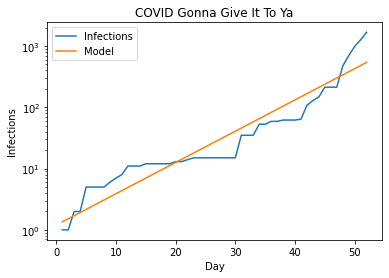

In [8]:
#Show best fit line on graph.
plt.plot(df["Day"], df["Infections"], label="Infections")
plt.xlabel('Day')
plt.ylabel('Infections')
plt.title('COVID Gonna Give It To Ya')
plt.yscale('log')
plt.plot(x, y_fit, label="Model")
plt.legend()

#### Our Data and its Analytical Match

What does all this mean? These general points are important! 

One of the uses of analytical models is to give us a simplied model that we can use to examine real data. 
The closer the data is to the model, the better it "fits". This allows us to utilize all that we know about that distribution to add to what we know from our data - if we know that our data follows a certain distribution (determined by matching our data to an analytical distribution) with certain parameters (measured from our emperical data), we can use this to do things like make predictions and generalizations based on a small(ish) emperical sample. We "know" the data will be distributed in a certain way, so all we need to do is adapt that to our specific inputs. 

Matching the distribution seen in our data to a known analytical distribution is a very important concept, especially as we move on to inferential (using stats to make predictions) statistics going forward. This is also why we can generalize things like polling from a small sample. We know, mathmatically, what to expect from an analytical distribution, so if we can "fit" our data to one of these distributions, we can use all that knowledge to draw conclusions on our data. 

Things like the log scale for exponential functions give us a way to look for fit. There's visual and analytical methods. 

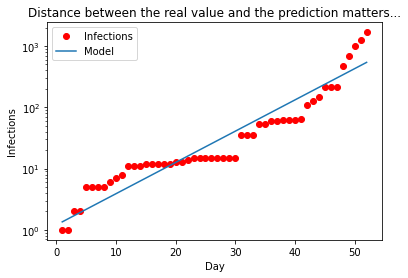

In [9]:
#Show best fit line on graph.
plt.plot(df["Day"], df["Infections"], "or", label="Infections")
plt.xlabel('Day')
plt.ylabel('Infections')
plt.title('Distance between the real value and the prediction matters...')
plt.yscale('log')
plt.plot(x, y_fit, label="Model")
plt.legend()

#### Analytical Predictions

We can "undo" the log part to see our new predictions! They aren't awesome, but we just started. 

The closer of a match that we can get of an analytical distribution to our emperical distribution, the more that analytical distribution will help us make generalizations. There are a few things we can do to improve this match:
<ul>
<li> Increase sample size - if possible, adding more sample data will allow us to better and more accurately match to an analytical distribution. 
<li> Use transformations - things like logs to make skewed normal distributions normal can help manipulate data to more closely match an analytical distribution. 
<li> Choose different distributions - we will look at a few, there are many. While the bulk of scenarios can be captured with a handful of distributions (normal, lognormal, exponential, pareto, etc...), there are a bunch that may fit your data. 
<li> Balance fit to the model - this is a concept that we'll revisit heavily when doing machine learning. In short, we want an analytical model that follows the same pattern as our emperical distribution - but is not <b>so</b> tailored to the data that it does things like follow singular outliers to the detriment of the overall fit. 
</ul>

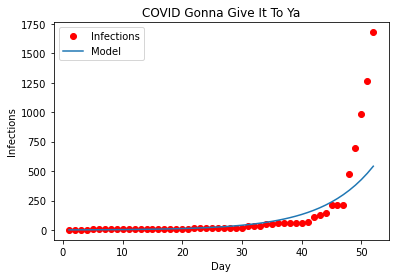

In [10]:
plt.plot(df["Day"], df["Infections"], "or", label="Infections")
plt.xlabel('Day')
plt.ylabel('Infections')
plt.title('COVID Gonna Give It To Ya')
plt.plot(x,y_fit, label="Model")
plt.legend()